## Project - Stochastic Gradient Descent on Linear Regression

In this project we are going to use the basic stochastic gradient descent algorithm to create a model that will help you find the local minima by predicting the best time to go to the gym and avoid crowds, so we can enjoy workout with minimal wait times and no crowds. We are going to use a dataset which contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days.
The planned workflow:
* Use the Pandas library to load the dataset into a DataFrame, run exploratory data analysis, and clean the dataset for training a model.
* After cleaning the set, split the data into training and testing sets.
* Use the SDGRegressor from the Scikit Learn library to build and train a stochastic gradient descent linear regression model to predict how many people are at the gym on a given day from the features inputed.
* Evaluate the model and visualize the results using matplotlib.

![Image](https://images.unsplash.com/photo-1519859660545-3dea8ddf683c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2064&q=80)
_Photo by George Pagan III on Unsplash_

### Import Libraries and Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor 
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 20/crowdness_gym_data.csv")

### Description of columns fom the dataset

* `number_people`: this is the number of people at the gym at each observation. This will be our target variable or label.
* `date`: a string value with the specific date and time information.
* `timestamp`: an integer (int), with the number of seconds since the start of the day (00:00).
* `dayofweek`: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
* `is_weekend`: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
* `is_holiday`: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
* `temperature`: a float, defining the temperature during the day of the observation in Fahrenheit.
* `isstartof_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
* `is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
* `month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
* `hour`: an integer (int) for the hour of the day from 0 to 23.

### EDA and Cleaning the Data

Overview of the data

In [3]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


Over 60,000 entries and no null values.
Basic statistical information about the dataset:

In [5]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


The only problematic feature is the `date` column, which is an object, but because we already have other features that give us the specific day and time, we will drop the date column.

In [6]:
df = df.drop('date', axis=1)

Next we will perform some Univariate Analysis (using bar plots) for the `month`, `day_of_week` and `hour` since they probably have the largest influence on the ammount of people.

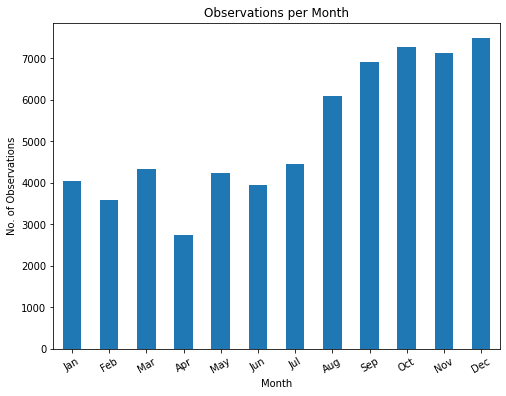

In [7]:
month_counts = df.groupby('month')['month'].count()


month_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Observations per Month')
plt.ylabel('No. of Observations')
plt.xlabel('Month')


month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12), labels=month_names, rotation=30)

plt.show()

We observe that once the academic year starts, the number of people that go to the gym increases and towards the end (April) it reaches its lowest points.

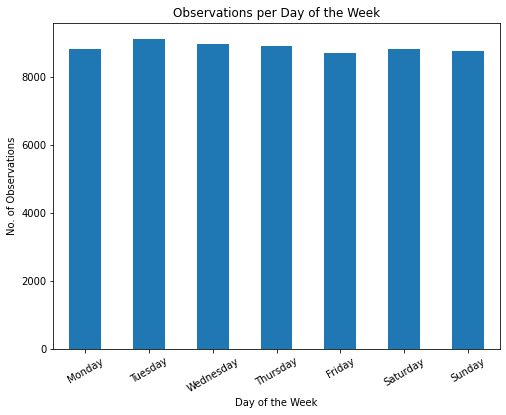

In [8]:
plt.figure(figsize=(8, 6))


df['day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title('Observations per Day of the Week')
plt.ylabel('No. of Observations')
plt.xlabel('Day of the Week')


day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), day_names, rotation=30)

plt.show()

Tuesday seems to be the most common day, but there are not significant differencees when it comes to the day of the week.

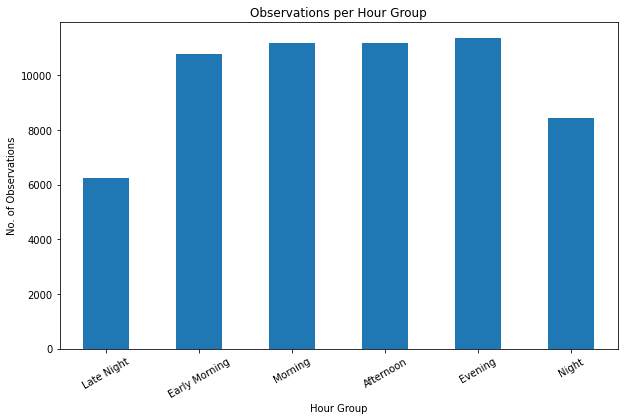

In [9]:
df_viz=df.copy()
df_viz['hour_group'] = pd.cut(df_viz['hour'], bins=[0, 4, 8, 12, 16, 20, 24], 
                               labels=['Late Night', 'Early Morning', 'Morning', 
                                       'Afternoon', 'Evening', 'Night'])
plt.figure(figsize=(10, 6))
df_viz.groupby('hour_group')['hour'].count().plot(kind='bar')
plt.xlabel('Hour Group')
plt.xticks(rotation=30)
plt.ylabel('No. of Observations')
plt.title('Observations per Hour Group')
plt.show()


Data shows the gym is busiest during regular hours. THe number of visitors decreases during off-peak hours (after 20).
Next we will use Bivariate Analysis to explore any correlations between month, day of the week and hour of the day compared to the number of people.

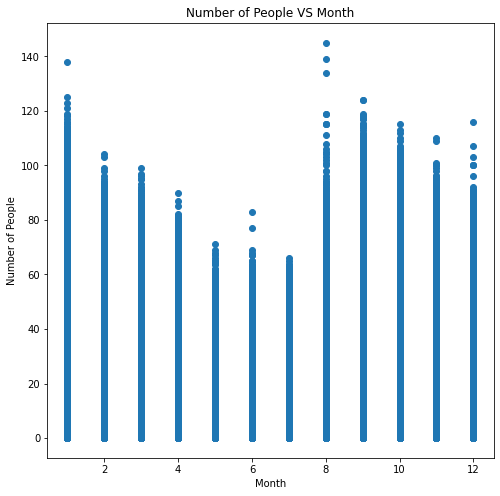

In [10]:
plt.figure(figsize=(8, 8))

plt.scatter(df['month'], df['number_people'])
plt.title("Number of People VS Month")
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.show()

The above relationship confirms that the begining of the semester has larger peaks than the end of it.

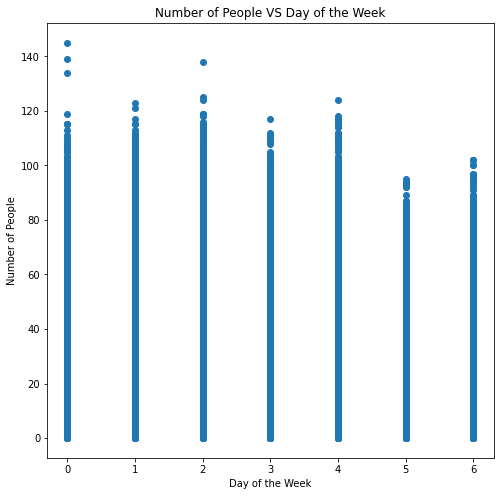

In [11]:
plt.figure(figsize=(8, 8))

plt.scatter(df['day_of_week'], df['number_people'])
plt.title("Number of People VS Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.show()

The largest peaks occur on Monday and Wednesday and the lower peaks on Saturdays.

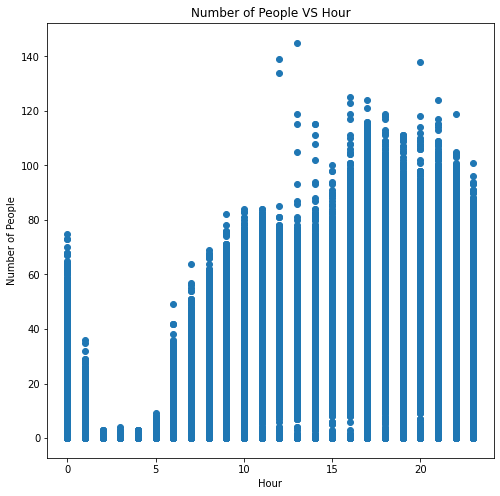

In [12]:
plt.figure(figsize=(8, 8))

plt.scatter(df['hour'], df['number_people'])
plt.title("Number of People VS Hour")
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.show()

The largest peaks of people are during the afternoon and evening hours and alsosurprsingly at night. The scatter plot reveals very small peaks from 2am to 5am.

Next we will use a set of tools, from correlation tables, pairplots and a heatmap, to quickly see the relationship between each variable and the outcome - the number of people.

In [13]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


We can see how the `hour`, `temperature` and interestingly the `is_during_semester` variables have the largest weight. `timestamp` and `hour` variables have a very similar weight, which means they could be redundant.

In [14]:
df = df.drop('timestamp', axis=1)

Next we will use pairplot() function on seaborn, which gives a scatterplot for each pair of variables. It can be harder to read than the table though, but it can help us see some interesting pattern emerge.

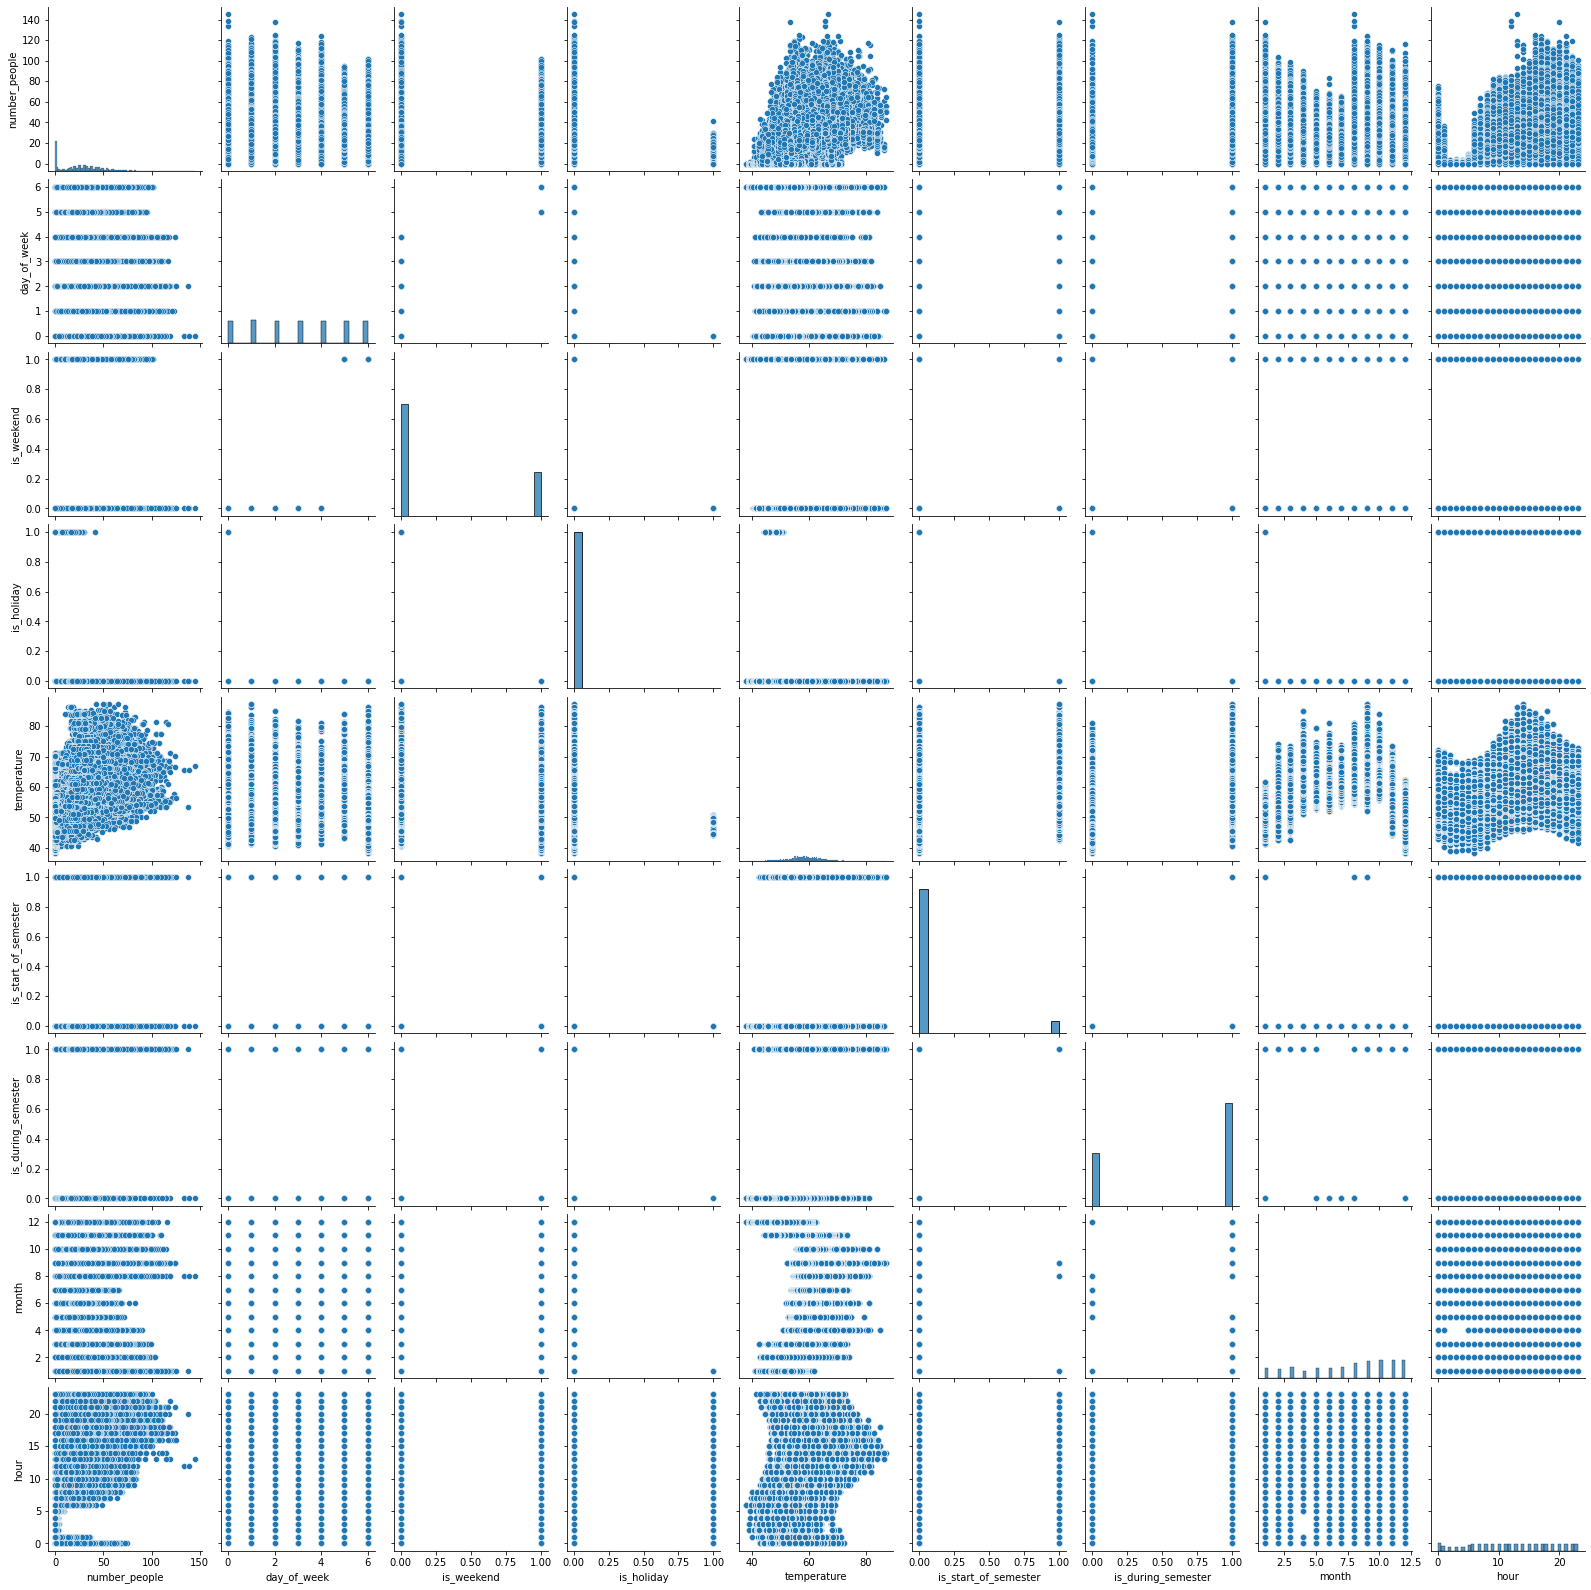

In [15]:
sns.pairplot(df)

<AxesSubplot:>

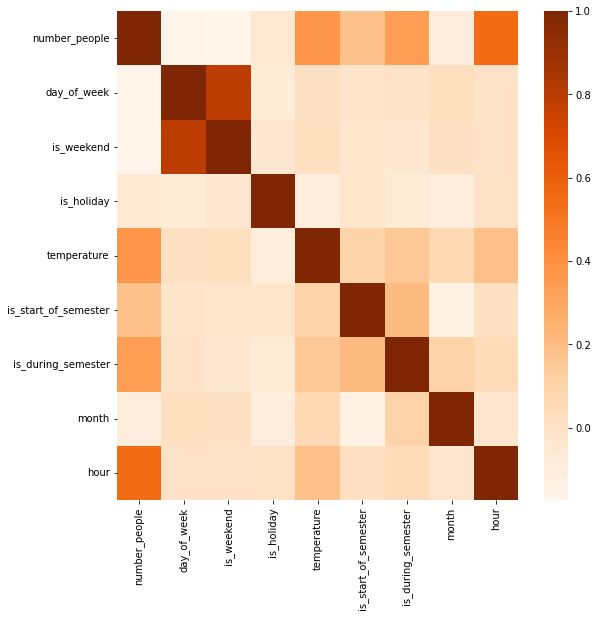

In [16]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), cmap='Oranges')

This simply confirms the previous result, namely that `temperature`, `hour` and `is_during_semester` variables are the most influential.

### Preparing to Build Our Model

Now we have a clean dataset without noisy data or data that isn't useful for our model. The next step is to prepare our data for modeling by spliting between training and test sets

In [17]:
data = df.values
X = df.drop(['number_people'],axis=1)
y =df['number_people']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Testing label shape: {y_test.shape}")

Training features shape: (43528, 8)
Testing features shape: (18656, 8)
Training label shape: (43528,)
Testing label shape: (18656,)


We'll proceed with building the model using SGDRegressor. We'll set the learning rate to optimal, use huber loss as the loss function, and apply elasticnet as the penalty. 

In [19]:
sgd_v1 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

In [20]:
sgd_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

### Measure the Performance of the Model

Now that the model is trained, it's time to measure its performance by using the previously loaded metrics: mean_square_error, mean_absolute_error or r2_score.

In [21]:
y_pred_v1 = sgd_v1.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v1),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v1),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v1),3)}")

Mean squared error: 254.545
R2 score: 0.506
Mean absolute error: 12.135


Mean Squared Error and Mean Absolute Error are fairly high, this implying that the model is not incredibly accurate. The coefficient of determination is 0.506.

To improve the model, we can try to scale the features to normalize them.

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
sgd_v2 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

In [25]:
sgd_v2.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='optimal', loss='squared_epsilon_insensitive',
             penalty='elasticnet', random_state=52)

In [26]:
y_pred_v2 = sgd_v2.predict(X_test_scaled)  # Predict labels

In [27]:
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v2),3)}")
print(f"R2 score: {round(r2_score(y_test, y_pred_v2),3)}")
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v2),3)}")

Mean squared error: 251.732
R2 score: 0.512
Mean absolute error: 12.185


With the scaled data, the model performs slightly better, decresing the Mean Squared Error and Mean Absolute Error and slightly increasing the R2 score.

### Visualizing the Results

A good way to understand and evaluate our models is to visualize their results. We will create a line plot that incudes a line for the test data and the predictions from the model.

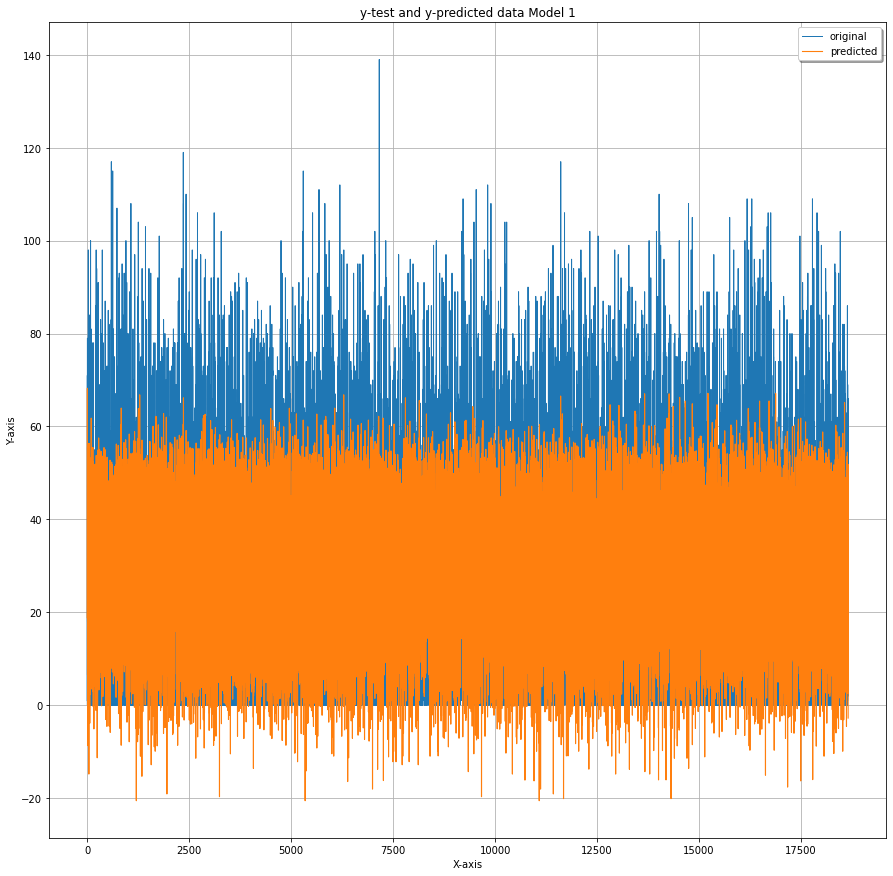

In [28]:
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v1, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 1")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

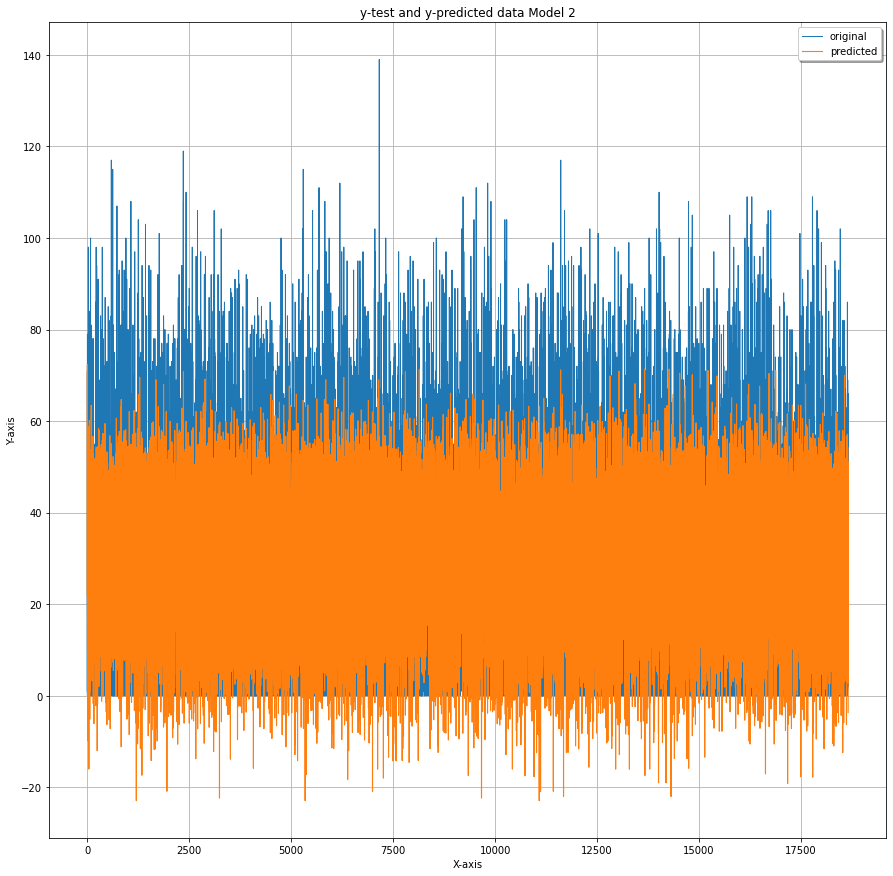

In [29]:
# Model v2

plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 2")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Summarizing the results

We can conclude that the outcome is affected most significantly by the `hour`, `temperature`, and `is_during_semester` features. There is room for improvement for the model's accuracy ( we can do that by using additional features or experimenting with different hyperparameters or collecting more data), but the developed model using the stochastic gradient descent regression provides a reasonable prediction for the number of people visiting the gym based on the given features.